In [2]:
#Import The Requered Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
print("Lets Import the Datasets.......\n")

try:
    df = pd.read_csv("Data Sheet/weatherHistory.csv")
    df.head()
except Exception as e:
    print(f"error {e}")

Lets Import the Datasets.......



,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
print("Convert the Columns of the Date into the multiple columns........")
try:
    df["Formatted Date"] = pd.to_datetime(df['Formatted Date'], utc=True)

    df['year'] = df['Formatted Date'].dt.year
    df['month'] = df['Formatted Date'].dt.month
    df['day'] = df['Formatted Date'].dt.day
    df['hour'] = df['Formatted Date'].dt.hour
    df['minute'] = df['Formatted Date'].dt.minute
    df['second'] = df['Formatted Date'].dt.second
except Exception as e:
    print(f"error {e}")

Convert the Columns of the Date into the multiple columns........


In [ ]:
try:
    df.drop(columns='Formatted Date',axis=1,inplace=True)
    df.head(3)
except Exception as e:
    print(f"error {e}")

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,year,month,day,hour,minute,second
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,22,0,0
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,23,0,0
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,0,0,0


In [ ]:
new_index = [
    "year",
    "month",
    "day",
    "hour",
    "minute",
    "second",
    "Summary",
    "Precip Type",
    "Humidity",
    "Wind Speed (km/h)",
    "Wind Bearing (degrees)",
    "Visibility (km)",
    "Loud Cover",
    "Pressure (millibars)",
    "Apparent Temperature (C)",
    "Daily Summary",
    "Temperature (C)"
]

try:
    df = df.reindex(columns=new_index)
except Exception as e:
    print(f"error {e}")

In [7]:
print(f"The total number of Rows is {df.shape[0]} and the Total Column is {df.shape[1]}")

The total number of Rows is 96453 and the Total Column is 17


In [8]:
df.head(3)

,year,month,day,hour,minute,second,Summary,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Apparent Temperature (C),Daily Summary,Temperature (C)
0,2006,3,31,22,0,0,Partly Cloudy,rain,0.89,14.1197,251.0,15.8263,0.0,1015.13,7.388889,Partly cloudy throughout the day.,9.472222
1,2006,3,31,23,0,0,Partly Cloudy,rain,0.86,14.2646,259.0,15.8263,0.0,1015.63,7.227778,Partly cloudy throughout the day.,9.355556
2,2006,4,1,0,0,0,Mostly Cloudy,rain,0.89,3.9284,204.0,14.9569,0.0,1015.94,9.377778,Partly cloudy throughout the day.,9.377778


In [8]:
print("Let See there is any null value is present or not........")

df.isnull().sum()

Let See there is any null value is present or not........


year                          0
month                         0
day                           0
hour                          0
minute                        0
second                        0
Summary                       0
Precip Type                 517
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Apparent Temperature (C)      0
Daily Summary                 0
Temperature (C)               0
dtype: int64

In [ ]:
print("Lets Fillup the Null value of the Requered Columns........\n")
try:
    df['Precip Type'] = df['Precip Type'].fillna(df['Precip Type'].mode()[0])
except Exception as e:
    print(f"error {e}")

Lets Fillup the Null value of the Requered Columns........



In [10]:
print("Lets ReCheck the null value is present or not........")
df.isnull().sum()

Lets ReCheck the null value is present or not........


year                        0
month                       0
day                         0
hour                        0
minute                      0
second                      0
Summary                     0
Precip Type                 0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Apparent Temperature (C)    0
Daily Summary               0
Temperature (C)             0
dtype: int64

Lets Check the Outliers of the All Columns........



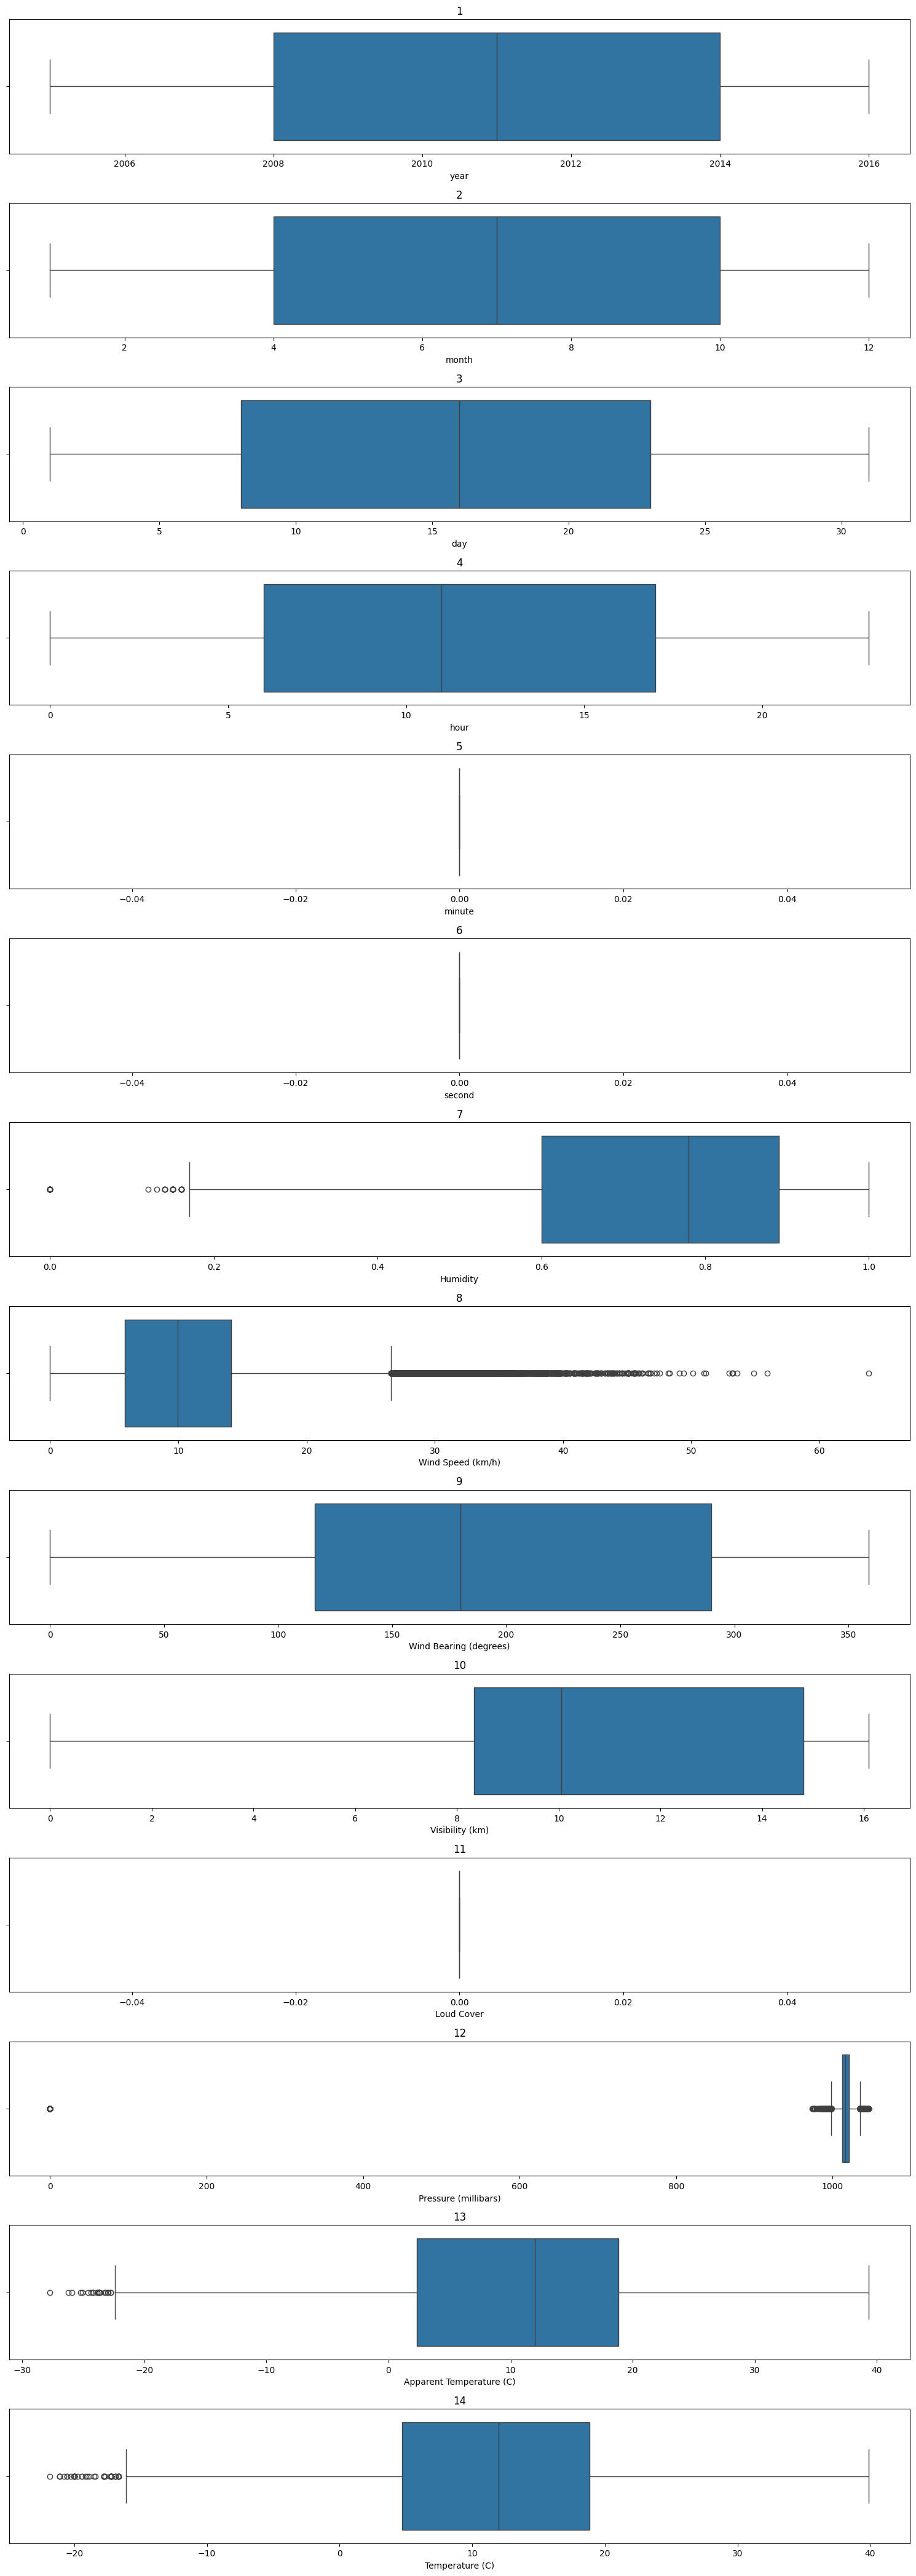

In [ ]:
try:

    temp1 = []
    temp2 = []

    for i in df.columns:
        if df[i].dtype == 'object':
            #Store Object type of the Columns
            temp1.append(i)
        else:
            #Store Numaric Columns
            temp2.append(i)
except Exception as e:
    print(f"error {e}")
            
print("Lets Check the Outliers of the All Columns........\n")

try:
    plt.figure(figsize=(15,3*len(temp2)))
    for i in range(1,len(temp2)+1):
        plt.subplot(len(temp2),1,i)
        sns.boxplot(x = temp2[i-1],data=df)
        plt.title(f"{i}")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"error {e}")

In [ ]:
#Lets Remove the Outliers of the Some Columns That have a very high Outliers.
print("Lets remove the outliers...............")
try:
    temp_list = ['Wind Speed (km/h)','Pressure (millibars)','Apparent Temperature (C)']

    for i in temp_list:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1

        min_range = q1 - (1.5 * iqr)
        max_range = q3 + (1.5 * iqr)

        df = df[(df[i] >= min_range) & (df[i] <= max_range)]
except Exception as e:
    print(f"error {e}")

Lets remove the outliers...............


In [13]:
df.head(3)

,year,month,day,hour,minute,second,Summary,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Apparent Temperature (C),Daily Summary,Temperature (C)
0,2006,3,31,22,0,0,Partly Cloudy,rain,0.89,14.1197,251.0,15.8263,0.0,1015.13,7.388889,Partly cloudy throughout the day.,9.472222
1,2006,3,31,23,0,0,Partly Cloudy,rain,0.86,14.2646,259.0,15.8263,0.0,1015.63,7.227778,Partly cloudy throughout the day.,9.355556
2,2006,4,1,0,0,0,Mostly Cloudy,rain,0.89,3.9284,204.0,14.9569,0.0,1015.94,9.377778,Partly cloudy throughout the day.,9.377778


In [14]:
print("Lets Check the Data Types of the all columns........")
df.dtypes

Lets Check the Data Types of the all columns........


year                          int32
month                         int32
day                           int32
hour                          int32
minute                        int32
second                        int32
Summary                      object
Precip Type                  object
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Apparent Temperature (C)    float64
Daily Summary                object
Temperature (C)             float64
dtype: object

In [ ]:


try:
    print("Lets Encode all the Objects type of the Columns........")

    # Create a dictionary to store label encoders for each categorical column
    label_encoders = {}
    for i in temp1:
        lb = LabelEncoder()
        df[i] = lb.fit_transform(df[i])
        label_encoders[i] = lb  # Store the fitted encoder for each column
except Exception as e:
    print(f"error {e}")

Lets Encode all the Objects type of the Columns........


In [16]:
print("Lets Check the All the Columns after the using Labelencoder........")
df.head()

Lets Check the All the Columns after the using Labelencoder........


,year,month,day,hour,minute,second,Summary,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Apparent Temperature (C),Daily Summary,Temperature (C)
0,2006,3,31,22,0,0,12,0,0.89,14.1197,251.0,15.8263,0.0,1015.13,7.388889,195,9.472222
1,2006,3,31,23,0,0,12,0,0.86,14.2646,259.0,15.8263,0.0,1015.63,7.227778,195,9.355556
2,2006,4,1,0,0,0,10,0,0.89,3.9284,204.0,14.9569,0.0,1015.94,9.377778,195,9.377778
3,2006,4,1,1,0,0,12,0,0.83,14.1036,269.0,15.8263,0.0,1016.41,5.944444,195,8.288889
4,2006,4,1,2,0,0,10,0,0.83,11.0446,259.0,15.8263,0.0,1016.51,6.977778,195,8.755556


In [ ]:
#Feture Selectino
try:
    print("Lets Select the Feture for the training data........")
    x = df.iloc[:,:-2]
    y = df[['Temperature (C)','Daily Summary']]
except Exception as e:
    print(f"error {e}")

Lets Select the Feture for the training data........


In [ ]:
#Train and Test the Model 
print("Lets use the train_test_split.......................")
try:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
except Exception as e:
    print(f"error {e}")

Lets use the train_test_split.......................


In [ ]:
print("Feture Scaling for all the Data........")
try:
    std = StandardScaler()

    x_train_scaled = std.fit_transform(x_train)
    x_test_scaled = std.transform(x_test)
except Exception as e:
    print(f"error {e}")

Feture Scaling for all the Data........


In [ ]:
#Using the RandomForestRegressor
print("Training Random Forest Regressor Model..........")
try:
    lfr = RandomForestRegressor(n_estimators=200,random_state=42,n_jobs=-1)
    lfr.fit(x_train_scaled,y_train)

    y_predicted = lfr.predict(x_test_scaled)
except Exception as e:
    print(f"error {e}")

Training Random Forest Regressor Model..........


In [21]:
y_temp_predict = y_predicted[:,0]
y_sumury_predict = y_predicted[:,1]

In [ ]:
try:

    print("Lets See the Different Different Parameters of the model........\n")

    print("Mean Absolute Error (MAE): ", round(mean_absolute_error(y_test.iloc[:,0], y_temp_predict),2))
    print("Mean Squared Error (MSE): ", round(mean_squared_error(y_test.iloc[:,0], y_temp_predict),2))
    print("Root Mean Squared Error (RMSE): ", round(np.sqrt(mean_squared_error(y_test.iloc[:,0], y_temp_predict)),2))
    print("R² Score: ",round(r2_score(y_test.iloc[:,0], y_temp_predict),2))
except Exception as e:
    print(f"error {e}.")

Lets See the Different Different Parameters of the model........

Mean Absolute Error (MAE):  0.59
Mean Squared Error (MSE):  0.71
Root Mean Squared Error (RMSE):  0.84
R² Score:  0.99


In [ ]:
#Using the Linear Regression Model

print("Training Linear Regression Model..........")
try:
    lr = LinearRegression()

    lr.fit(x_train_scaled,y_train)
    y_linear_predicted = lr.predict(x_test_scaled)
except Exception as e:
    print(f"error {e}")

Training Linear Regression Model..........


In [ ]:
try:

    y_temp_linear_predict = y_linear_predicted[:,0]
    y_summury_linear_predict = y_linear_predicted[:,1]

    print("Mean Absolute Error (MAE) : ",round(mean_absolute_error(y_test.iloc[:,0],y_temp_linear_predict),2))
    print("Mean Squared Error (MSE) : ",round(mean_squared_error(y_test.iloc[:,0],y_temp_linear_predict),2))
    print("Root Mean Square Error (RMSE) : ",round(np.sqrt(mean_squared_error(y_test.iloc[:,0],y_temp_linear_predict)),2))
    print("R² Score : ",round(r2_score(y_test.iloc[:,0],y_temp_linear_predict),2))
except Exception as e:
    print(f"error {e}.")

Mean Absolute Error (MAE) :  0.7
Mean Squared Error (MSE) :  0.79
Root Mean Square Error (RMSE) :  0.89
R² Score :  0.99


In [ ]:
print("======================= User Input Temperature Prediction =======================")

#Define One FUnction for the User Input.
def UserInput():
    try:
        #Int User Data
        year = int(input("Enter Year: "))
        month = int(input("Enter Month (e.g., 5, 12, 9): "))
        day = int(input("Enter Day (e.g., 12, 25): "))
        hour = int(input("Enter Hour: "))
        minute = int(input("Enter Minute: "))
        second = int(input("Enter Second: "))

        #Object Types of User data
        Summary = input("Enter Summary (eg.Partly Cloudy,Mostly Cloudy,Overcast,Foggy): ")
        Precip_Type = input("Enter Precip Type (eg.rain,snow): ")       

        #Float User Data
        Humidity = float(input("Enter Humidity: "))         
        Wind_Speed = float(input("Enter Wind Speed (km/h): "))    
        Wind_Bearing = float(input("Enter Wind Bearing (degrees): "))  
        Visibility = float(input("Enter Visibility (km): "))         
        Cloud_Cover = float(input("Enter Cloud Cover: "))          
        Pressure = float(input("Enter Pressure (millibars): "))      
        Apparent_Temperature = float(input("Enter Apparent Temperature (C): "))
        
        data = {
            'year': year,
            'month': month,
            'day': day,
            'hour': hour,
            'minute': minute,
            'second': second,
            'Summary': Summary,
            'Precip Type': Precip_Type,                 
            'Humidity': Humidity,
            'Wind Speed (km/h)': Wind_Speed,
            'Wind Bearing (degrees)': Wind_Bearing,
            'Visibility (km)': Visibility,
            'Loud Cover': Cloud_Cover,                   
            'Pressure (millibars)': Pressure,
            'Apparent Temperature (C)': Apparent_Temperature,
        }
    
        #Make the data frame of this user details. 
        input_data = pd.DataFrame([data])

        #Encode the Categorical Columns using the stored Label Encoders
        categorical_columns = ['Summary', 'Precip Type'] 
        for i in categorical_columns:
            if i in input_data.columns and i in label_encoders:
                input_data[i] = label_encoders[i].transform(input_data[i])

        # Ensure the input data has the same columns as the training data
        input_data = input_data[std.feature_names_in_]
        
        #Rescal the User Input
        scaled_input = std.transform(input_data)

        #Lets Do the Prediction using the Both the Models.

        predict_random_forest = lfr.predict(scaled_input)[0]
        predict_linear_regression = lr.predict(scaled_input)[0]

        # Reverse transform the Daily Summary predictions
        random_forest_reverse_prediction = label_encoders['Daily Summary'].inverse_transform([int(predict_random_forest[1])])[0]
        Linear_regression_reverse_prediction = label_encoders['Daily Summary'].inverse_transform([int(predict_linear_regression[1])])[0]

        print("\n" + "="*70)
        print("🌦️  WEATHER PREDICTION RESULT".center(70))
        print("="*70)

        print("\n[ Random Forest Model ]")
        print(f" → Predicted Temperature : {predict_random_forest[0]:.2f} °C")
        print(f" → Predicted Summary     : {random_forest_reverse_prediction}")

        print("\n[ Linear Regression Model ]")
        print(f" → Predicted Temperature : {predict_linear_regression[0]:.2f} °C")
        print(f" → Predicted Summary     : {Linear_regression_reverse_prediction}")

        print("\n" + "="*70)
        print("✅ Prediction Completed Successfully!".center(70))
        print("="*70)
    except Exception as e:
        print(f"error {e}")


UserInput()

SyntaxError: unterminated string literal (detected at line 35) (2642518885.py, line 35)

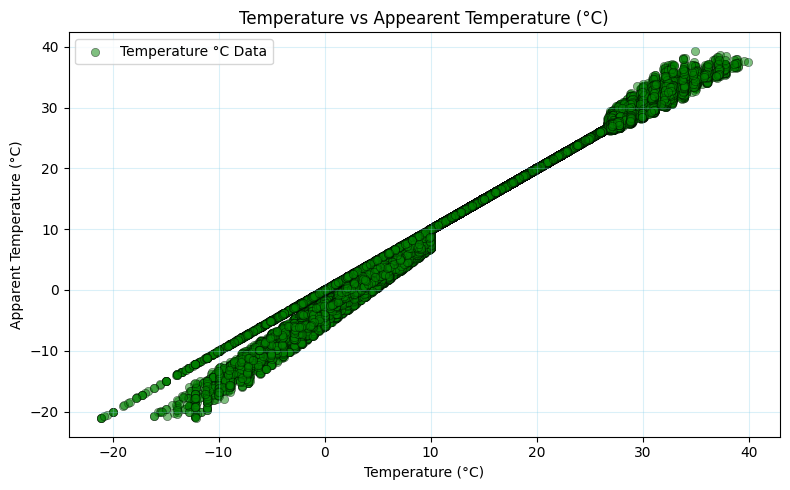

In [26]:
#Temperature vs Apparent Temperature

plt.figure(figsize=(8,5))
sns.scatterplot(x='Temperature (C)',y ='Apparent Temperature (C)',data = df,alpha=0.5,label="Temperature °C Data",color='green',edgecolor='black')
plt.title("Temperature vs Appearent Temperature (°C)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Apparent Temperature (°C)")
plt.grid(True,alpha=0.3,color='skyblue')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig("Figures/Temperature_vs_Appearent_Temperature_°C.png",dpi=400,bbox_inches='tight')
plt.show()

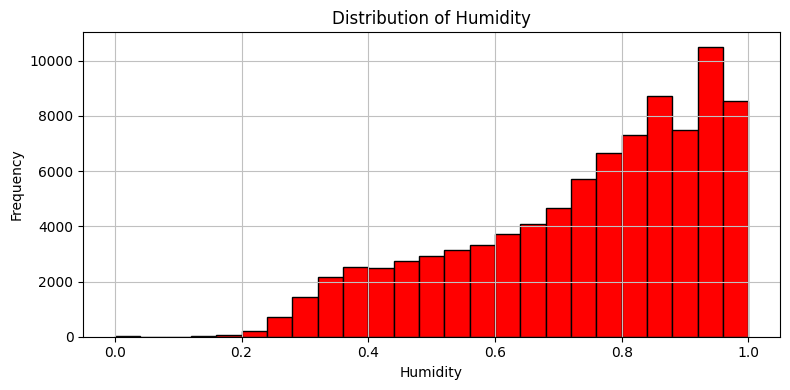

In [27]:
#Distribution of Humidity

plt.figure(figsize=(8,4))
plt.hist(df['Humidity'],bins=25,color="red",edgecolor='black')
plt.title("Distribution of Humidity")
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.grid(True,color='silver')
plt.savefig("Figures/Distribution_of_Humidity.png",dpi=400,bbox_inches='tight')
plt.tight_layout()
plt.show()

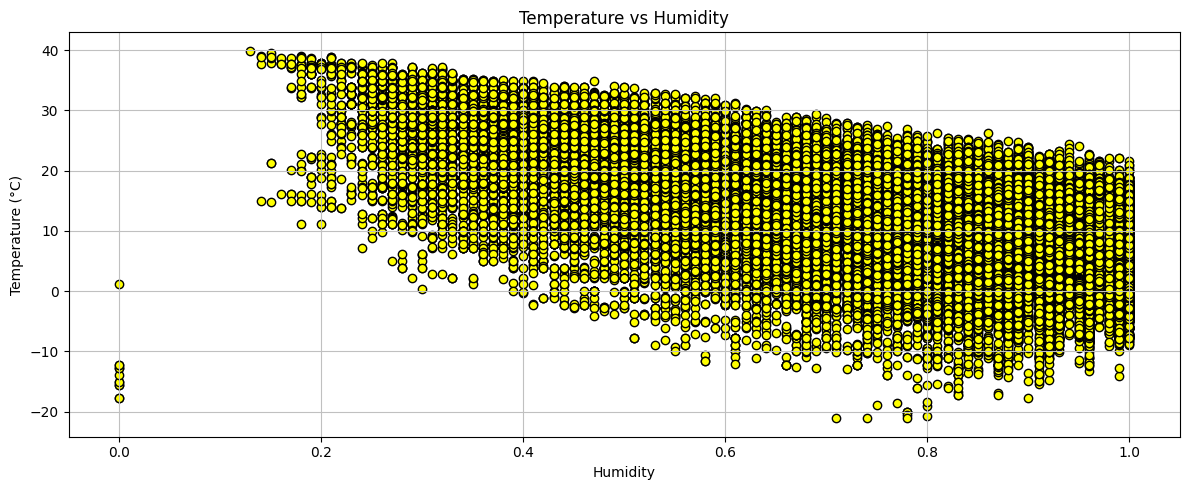

In [28]:
#Temperature vs. Humidity

plt.figure(figsize=(12,5))
plt.scatter(df['Humidity'],df['Temperature (C)'],color="yellow",edgecolor='black')
plt.title("Temperature vs Humidity")
plt.xlabel('Humidity')
plt.ylabel('Temperature (°C)')
plt.grid(True,color='silver')
plt.savefig("Figures/Temperature_vs_Humidity.png",dpi=400,bbox_inches='tight')
plt.tight_layout()
plt.show()

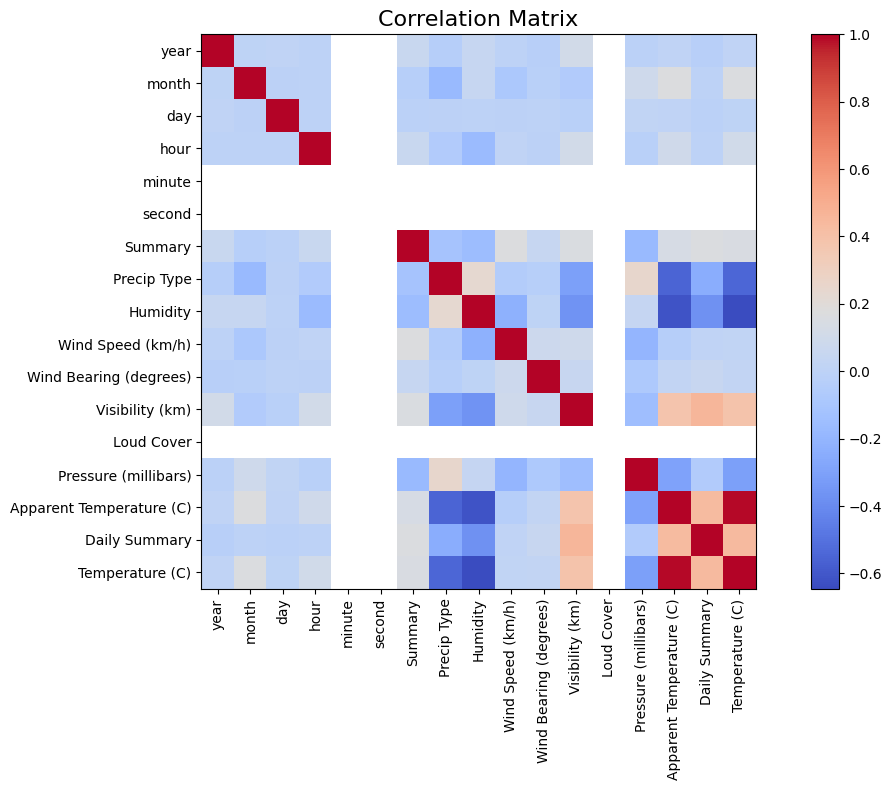

In [30]:
plt.figure(figsize=(12,8))
corr = df.corr()
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Matrix", fontsize=16)
plt.savefig("Figures/Correlation_Matrix.png",dpi=400,bbox_inches='tight')
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7420\474502692.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')
C:\Users\Admin\AppData\Local\Temp\ipykernel_7420\474502692.py:8: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.savefig("Figures/Temperature_vs_Humidity.png",dpi=300,bbox_inches='tight')
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


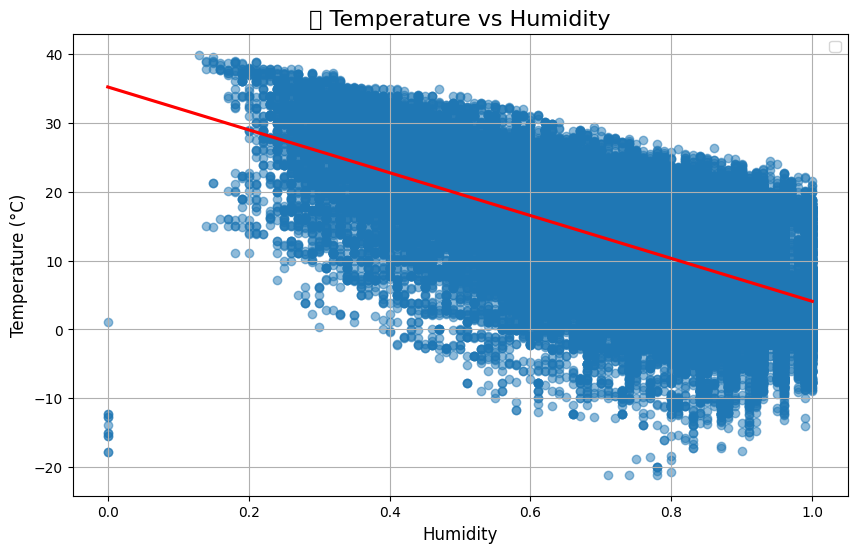

In [31]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Humidity', y='Temperature (C)', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("💧 Temperature vs Humidity", fontsize=16)
plt.xlabel("Humidity", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("Figures/Temperature_vs_Humidity.png",dpi=300,bbox_inches='tight')
plt.show()
